# Chapter 03: Statistical Underpinnings

## Gaussian versus linear functions

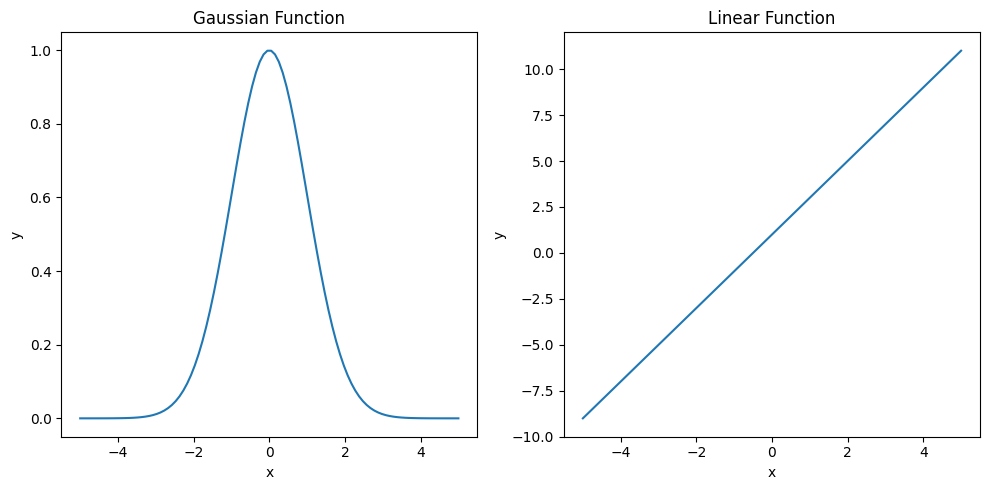

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data for the Gaussian function
x_gauss = np.linspace(-5, 5, 100)
y_gauss = np.exp(-x_gauss**2 / 2)  # Gaussian function

# Generate data for the linear function
x_linear = np.linspace(-5, 5, 100)
y_linear = 2 * x_linear + 1  # Linear function (y = 2x + 1)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Plot the Gaussian function on the left subplot
ax1.plot(x_gauss, y_gauss)
ax1.set_title('Gaussian Function')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Plot the linear function on the right subplot
ax2.plot(x_linear, y_linear)
ax2.set_title('Linear Function')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Display the plots
plt.tight_layout()
plt.show()

## Generating & fitting a tuning curve

Mean Squared Error (MSE): 131.404061118582


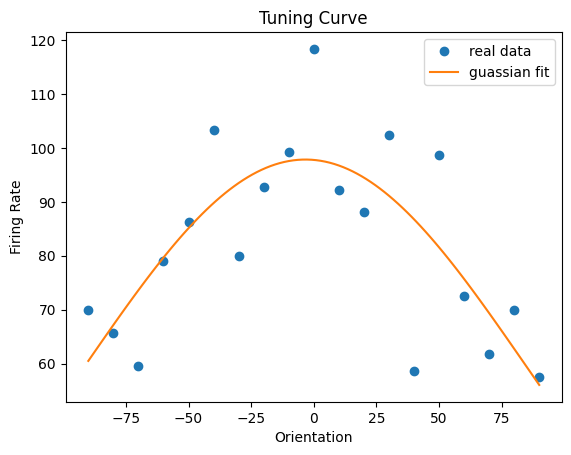

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate x data points from -90 to 90 with an interval of 10
x = np.arange(-90, 100, 10)

# Generate y data points following a Gaussian function with jitter of 10
# Mean of the Gaussian distribution is set to 0 and standard deviation to 1
y = 50 * np.exp(-(x)**2 / (2 * 50**2)) + 50 + np.random.normal(0, 10, len(x))

# Define the Gaussian function
def gaussian(x, amp, mu, sigma):
  return amp * np.exp(-(x - mu)**2 / (2 * sigma**2))

amp_guess = np.max(y) - np.min(y)  # Estimate amplitude
mu_guess = x[np.argmax(y)]  # Estimate mean
sigma_guess = np.std(y)  # Estimate standard deviation

popt, pcov = curve_fit(gaussian, x, y, p0=[amp_guess, mu_guess, sigma_guess])

# Calculate the MSE
y_pred = gaussian(x, *popt)  # Predicted values using the fitted curve
mse = np.mean((y - y_pred)**2)  # Mean of squared differences

# Print the MSE
print(f"Mean Squared Error (MSE): {mse}")

# Generate points for the fitted Gaussian curve
x_fit = np.linspace(min(x), max(x), 100)
y_fit = gaussian(x_fit, *popt)

# Plot the original data and the fitted Gaussian curve
plt.plot(x, y, 'o', label='real data')
plt.plot(x_fit, y_fit, '-', label='guassian fit')
plt.title('Tuning Curve')
plt.xlabel('Orientation')
plt.ylabel('Firing Rate')
plt.legend()
plt.show()